In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("HR_Data.csv")

In [26]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df_drop = df.drop(labels=['sales','salary'],axis=1)

In [6]:
df_drop

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [7]:
y = df_drop["left"]
X = df_drop.drop(labels=["left"], axis=1)

In [8]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [10]:
mean_vec = np.mean(X_std, axis=0)

In [11]:
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)

In [12]:
print('Covariance matrix \n', cov_mat)

Covariance matrix 
 [[ 1.00006668  0.10502822 -0.14297912 -0.02004945 -0.1008728   0.05870115
   0.02560689]
 [ 0.10502822  1.00006668  0.34935588  0.33976445  0.1315995  -0.00710476
  -0.00868435]
 [-0.14297912  0.34935588  1.00006668  0.41723845  0.19679901 -0.00474086
  -0.00606436]
 [-0.02004945  0.33976445  0.41723845  1.00006668  0.12776343 -0.01014356
  -0.00354465]
 [-0.1008728   0.1315995   0.19679901  0.12776343  1.00006668  0.00212056
   0.06743742]
 [ 0.05870115 -0.00710476 -0.00474086 -0.01014356  0.00212056  1.00006668
   0.03924805]
 [ 0.02560689 -0.00868435 -0.00606436 -0.00354465  0.06743742  0.03924805
   1.00006668]]


In [13]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [14]:
print('Eigenvectors \n', eig_vecs)



Eigenvectors 
 [[ 0.08797699  0.29189921  0.27784886  0.33637135  0.79752505  0.26786864
  -0.09438973]
 [-0.50695734 -0.30996609 -0.70780994  0.07393548  0.33180877  0.1101505
  -0.13499526]
 [-0.5788351   0.77736008 -0.00657105 -0.19677589 -0.10338032 -0.10336241
  -0.02293518]
 [-0.54901653 -0.45787675  0.63497294 -0.25170987  0.10388959 -0.01034922
  -0.10714981]
 [-0.31354922 -0.05287224  0.12200054  0.78782241 -0.28404472  0.04036861
   0.42547869]
 [ 0.01930249 -0.04433104 -0.03622859 -0.05762997  0.37489883 -0.8048393
   0.45245222]
 [-0.00996933 -0.00391698 -0.04873036 -0.39411153  0.10557298  0.50589173
   0.75836313]]


In [15]:
print('\nEigenvalues \n', eig_vals)


Eigenvalues 
 [1.83017431 0.54823098 0.63363587 0.84548166 1.12659606 0.95598647
 1.06036136]


In [16]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

In [17]:
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [18]:
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])


Eigenvalues in descending order:
1.8301743138755016
1.126596063991547
1.0603613622840846
0.9559864740066266
0.8454816637143479
0.6336358744830215
0.5482309765420619


In [20]:
var_exp = [(i / sum(eig_vals))*100 for i in sorted(eig_vals, reverse=True)]

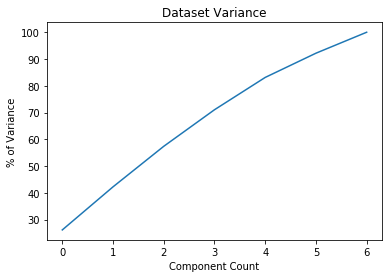

In [22]:
plt.figure()
plt.plot(np.cumsum(var_exp))
plt.xlabel('Component Count')
plt.ylabel('% of Variance')
plt.title('Dataset Variance')
plt.show()